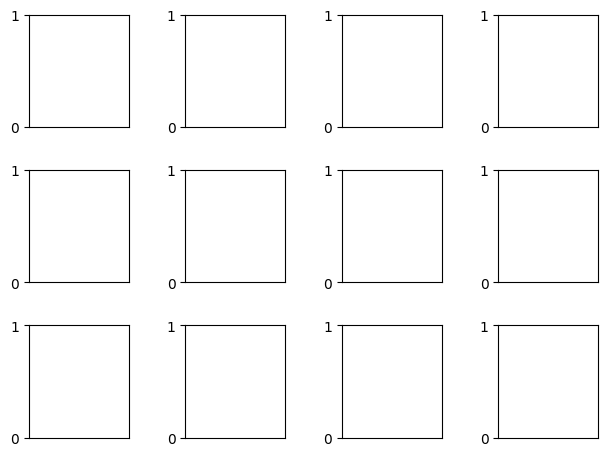

In [274]:
data_root = './data/'
temp_views = []
views = []
cnt = 0
ratio = 0.6

fig, ax = plt.subplots(3,4)
fig.tight_layout(pad=1)
#plt.setp(ax, xticks=[0.1, 0.5, 0.9], xticklabels=['a', 'b', 'c'], yticks=[0, 1])
plt.setp(ax, xticks= [], yticks=[0, 1])
for file_name in os.listdir(data_root):
    #temp_views = []
    data_path = os.path.join(data_root,file_name)
    with open(data_path, 'r', encoding='utf-8') as json_file:
        json_list = list(json_file)
    f = True
    i = 0
   
    for json_str in json_list:
        result = json.loads(json_str)
        #if result['image']!=None:
        temp_views.append(float(result['views']))

77.0 1962.0
106.0 7773.0
100.0 2172.0
89.0 3686.0
29.0 689.0
66.0 982.0
74.0 10316.0
44.0 1442.0
189.0 12910.0
138.0 4513.0
78.0 7370.0


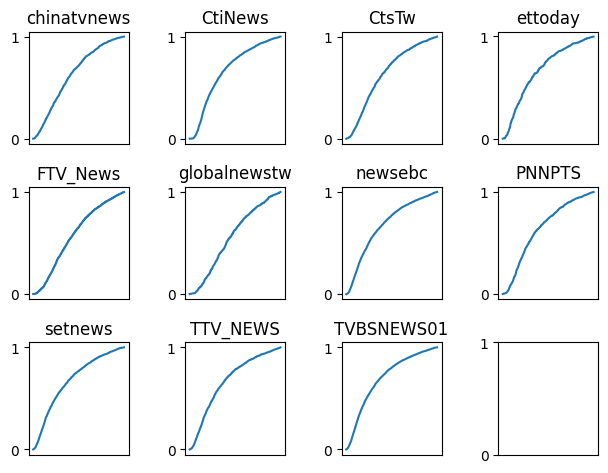

In [302]:
import os
import json
import numpy as np
targets = []

data_root = './data/'
temp_views = []
views = []
cnt = 0
ratio = 0.7

fig, ax = plt.subplots(3,4)
fig.tight_layout(pad=1)
plt.setp(ax, xticks= [], yticks=[0, 1])
for file_name in os.listdir(data_root):
    if cnt < 0:
      cnt+=1
      continue
    temp_views = []
    data_path = os.path.join(data_root,file_name)
    with open(data_path, 'r', encoding='utf-8') as json_file:
        json_list = list(json_file)
    f = True
    i = 0
   
    for json_str in json_list:
        result = json.loads(json_str)
        #if result['image']!=None:
        temp_views.append(float(result['views']))

    temp_views.sort()
    #temp_views = temp_views[int(len(temp_views)*ratio):]
    temp_views = temp_views[:int(len(temp_views)*ratio)]
    
    max_v = max(temp_views)
    
    min_v = min(temp_views)
    print(min_v, max_v)
    for i in range(len(temp_views)):
        temp_views[i] -= min_v
        temp_views[i] /= (max_v-min_v)
    for view in temp_views:
        views.append(view)
    y = np.array(range(len(temp_views))) / len(temp_views)
    ax[int(cnt/4)][int(cnt%4)].plot(temp_views, y)
    ax[int(cnt/4)][int(cnt%4)].set_title(os.path.basename(file_name).split(".")[0])
    #for view in temp_views:
    #    views.append(view)

    cnt+=1
    #break

In [304]:
views = np.array(views)

In [305]:
views.shape

(20980,)

In [310]:
mean = sum(views)/len(views)
predictions = np.array([mean for _ in range(len(views))])

In [313]:
views**2

array([0.00000000e+00, 5.51611564e-05, 1.90249703e-04, ...,
       9.98629104e-01, 9.98903208e-01, 1.00000000e+00])

In [316]:
mean = sum(views)/len(views)
var = sum(views**2)/len(views) - mean**2
var

0.06101241163774718

In [311]:
predictions.shape

(20980,)

In [312]:
np.sqrt(np.mean((predictions-views)**2))

0.24700690605273823

In [291]:
sum(temp_views)/len(temp_views)

0.30080178609487435

In [184]:
cdf = [0 for _ in range(100)]
max_v = int(max(views))
step = int(max(views)/100)
pre_i = 0
cnt = 0 
for i in range(0,max_v,step):
    for view in views:
        if view > pre_i and view < i:
            cdf[cnt] +=1
    cnt+=1
    pre_i = i

In [ ]:
fig, ax = plt.subplots(4,3)
ax[0][0].plot(x)

2627
1576.2
[74.0, 76.0, 122.0, 128.0, 147.0, 153.0, 178.0, 202.0, 204.0, 205.0, 213.0, 223.0, 228.0, 230.0, 238.0, 243.0, 244.0, 258.0, 263.0, 266.0, 266.0, 268.0, 269.0, 276.0, 278.0, 288.0, 289.0, 289.0, 291.0, 292.0, 295.0, 296.0, 310.0, 316.0, 319.0, 324.0, 340.0, 343.0, 347.0, 347.0, 351.0, 357.0, 362.0, 362.0, 364.0, 369.0, 370.0, 372.0, 374.0, 376.0, 380.0, 382.0, 382.0, 391.0, 393.0, 396.0, 396.0, 400.0, 402.0, 406.0, 407.0, 408.0, 415.0, 416.0, 417.0, 417.0, 417.0, 419.0, 422.0, 424.0, 429.0, 430.0, 433.0, 433.0, 433.0, 438.0, 439.0, 440.0, 441.0, 443.0, 447.0, 447.0, 449.0, 451.0, 451.0, 453.0, 455.0, 455.0, 455.0, 455.0, 456.0, 457.0, 459.0, 461.0, 462.0, 463.0, 464.0, 469.0, 473.0, 474.0, 475.0, 475.0, 480.0, 482.0, 483.0, 487.0, 489.0, 489.0, 491.0, 492.0, 493.0, 493.0, 494.0, 494.0, 494.0, 497.0, 497.0, 501.0, 504.0, 513.0, 514.0, 515.0, 515.0, 516.0, 517.0, 525.0, 527.0, 529.0, 529.0, 530.0, 530.0, 531.0, 531.0, 532.0, 533.0, 533.0, 536.0, 542.0, 543.0, 550.0, 551.0, 55

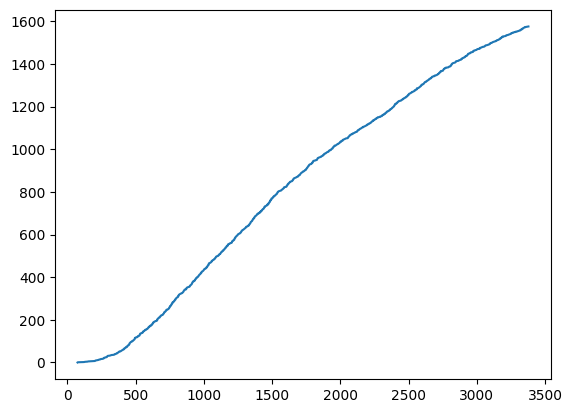

In [208]:
cdf_x = []
cdf_y = []

views.sort()
ratio = 0.6
print(len(views))
print(len(views) * ratio)

for inx, i  in enumerate(views):
    if inx > len(views) *  ratio:
        break   
    cdf_x.append(i)
    cdf_y.append(inx)
print(cdf_x)
print(cdf_y[-1])
plt.plot(cdf_x, cdf_y)


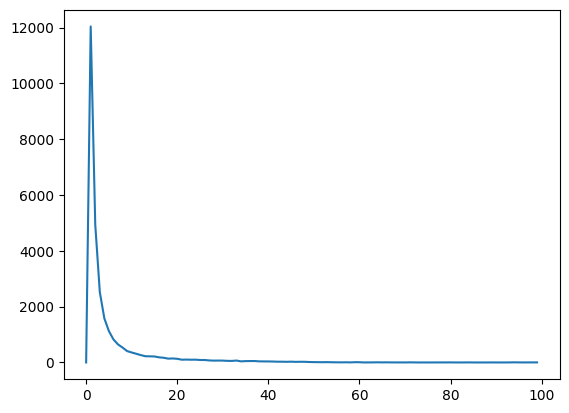

In [160]:
plt.plot(cdf)

In [267]:

f =  open('C:/Users/Ray/Desktop/DataScience/Final/logs/2023-06-11-04h29m.txt','r')
t_loss = []
v_loss = []
t_acc = []
v_acc = []
for line in f.readlines():
    if line[:5] == 'Valid':
        v_loss.append(float(line[23:29]))
        v_acc.append(float(line[36:-1]))
    elif line[:5] == 'Train':
        t_loss.append(float(line[23:29]))
        t_acc.append(float(line[36:-1]))

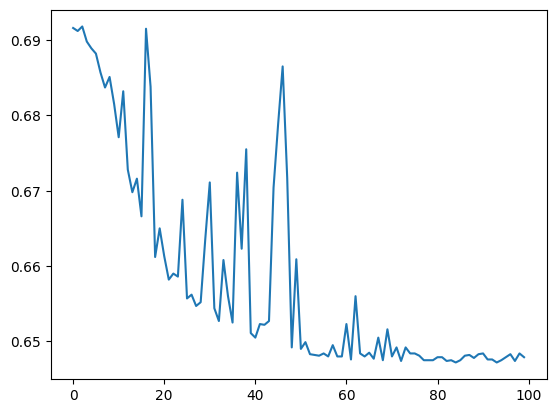

In [116]:
import matplotlib.pyplot as plt
plt.plot(v_loss)

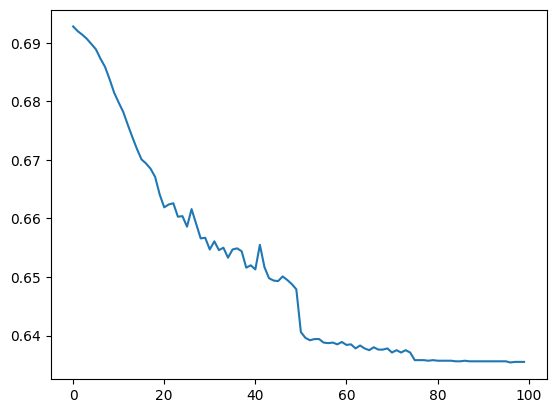

In [117]:
plt.plot(t_loss)

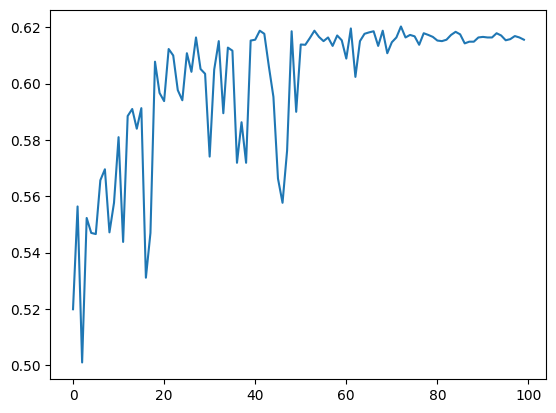

In [268]:
plt.plot(v_acc)

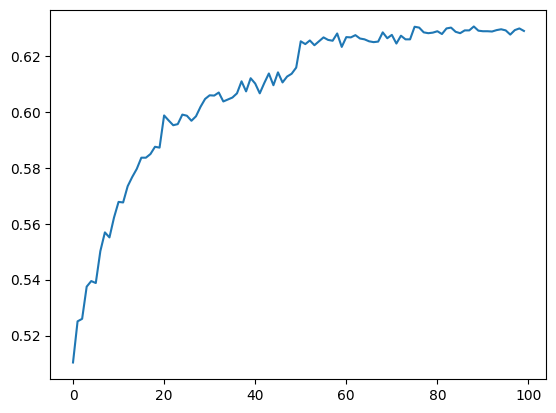

In [269]:
plt.plot(t_acc)

In [113]:
loss

[0.6916,
 0.6912,
 0.6918,
 0.6898,
 0.6889,
 0.6882,
 0.6857,
 0.6837,
 0.6851,
 0.6815,
 0.6771,
 0.6832,
 0.6728,
 0.6698,
 0.6716,
 0.6666,
 0.6915,
 0.6838,
 0.6612,
 0.665,
 0.6613,
 0.6582,
 0.659,
 0.6586,
 0.6688,
 0.6557,
 0.6562,
 0.6547,
 0.6552,
 0.6635,
 0.6711,
 0.6544,
 0.6527,
 0.6608,
 0.656,
 0.6525,
 0.6724,
 0.6623,
 0.6755,
 0.6511,
 0.6505,
 0.6523,
 0.6522,
 0.6527,
 0.6704,
 0.6788,
 0.6865,
 0.6717,
 0.6492,
 0.6609,
 0.649,
 0.6499,
 0.6483,
 0.6482,
 0.6481,
 0.6484,
 0.648,
 0.6495,
 0.648,
 0.648,
 0.6523,
 0.6476,
 0.656,
 0.6484,
 0.648,
 0.6485,
 0.6477,
 0.6505,
 0.6475,
 0.6516,
 0.648,
 0.6492,
 0.6474,
 0.6492,
 0.6484,
 0.6484,
 0.6481,
 0.6475,
 0.6475,
 0.6475,
 0.6479,
 0.6479,
 0.6474,
 0.6475,
 0.6472,
 0.6475,
 0.6481,
 0.6482,
 0.6478,
 0.6483,
 0.6484,
 0.6476,
 0.6476,
 0.6472,
 0.6475,
 0.6479,
 0.6483,
 0.6474,
 0.6484,
 0.6479]

In [93]:
#from transformers import BertTokenizer, BertModel
import torch 
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import requests
from tqdm import tqdm
import json
from utils import get_current_time
import os
from transformers import (
  BertTokenizerFast,
  AutoModel,
)

feature_size = 768
batch_size = 16
device = "cuda:0"
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#text_model = BertModel.from_pretrained("bert-base-uncased").to(device)
tokenizer = BertTokenizerFast.from_pretrained('bert-base-chinese')
text_model = AutoModel.from_pretrained('ckiplab/bert-base-chinese-ws').to(device)

Some weights of the model checkpoint at ckiplab/bert-base-chinese-ws were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at ckiplab/bert-base-chinese-ws and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [94]:
torch.save(text_model.state_dict(), './text_model.pth')

In [95]:
text_model.load_state_dict(torch.load('./text_model.pth'))

<All keys matched successfully>

In [82]:
encoded_inputs = tokenizer('啥子呢', max_length = 512, padding = 'max_length',return_tensors='pt')
input_ids = torch.squeeze(encoded_inputs['input_ids'])[None,:].to(device)
attention_mask = torch.squeeze(encoded_inputs['attention_mask'])[None,:].to(device)
text_embeddings = text_model(input_ids, attention_mask)['pooler_output'].to(device)

In [92]:
for i, title in enumerate(titles):
    print(f'{i}/{len(titles)}',end= '\r')
    encoded_inputs = tokenizer(title, max_length = 512, padding = 'max_length',return_tensors='pt')
    input_ids = torch.squeeze(encoded_inputs['input_ids'])[None,:].to(device)
    attention_mask = torch.squeeze(encoded_inputs['attention_mask'])[None,:].to(device)
    text_embeddings = text_model(input_ids, attention_mask)['pooler_output'].to(device)

In [87]:
import os
import json
data_root = './data/'

titles = []
targets = []
nodes = ['8 days', '2 weeks', '3 weeks', '4 weeks', '1 month']

for file_name in os.listdir(data_root):
    data_path = os.path.join(data_root,file_name)
    with open(data_path, 'r') as json_file:
        json_list = list(json_file)
    f = True
    i = 0
    views = []
    temp_titles = []
    for json_str in json_list:
        node = nodes[i]
        result = json.loads(json_str)
        if result['image']!=None:
            if result['upload_time'] == node and f:
                i+=1
                if node == '1 month':
                    break
                for title in temp_titles:
                    titles.append(title)
                midv = sorted(views)[int(len(views)/2)]
                for view in views:
                    if view>midv:
                        targets.append(1)
                    else:
                        targets.append(0)
                f = False
                views = []
                temp_titles = []
            if result['upload_time'] != node:
                f = True
            views.append(float(result['views']))
            temp_titles.append(result['title'])


In [86]:
len(titles)

26747

In [79]:
for i in range(len(targets)):
    print(targets[i], titles[i])
    if i==50:
        break

0 《生活一把罩》「經常覺得累」竟是身體發炎？！ 背部「這位置痛」罹癌王？！
0 《社會大代誌》就像刺激「警匪片」！ 檢警攻堅 民眾「搖滾區」全程目擊
0 《生活一把罩》喝醉酒？ 打瞌睡？ 民眾直擊員警值勤「狂點頭」
0 《社會大代誌》「恍神暴衝」人行道慘撞 轎車「烏龜翻」狠摔
0 "驅魔"再起? 31歲女陳屍租屋處 拘提4友人.室友│中視新聞 20230609
0 粽葉.豬肉全漲! 端午粽子"漲幅5-10%" 逼近便當價│中視新聞 20230610
1 【又嘉氣象報報】梅雨鋒面將至! 週末不穩定 週二起留意致災大雨│中視晨間氣象 20230610
0 "驅魔聖師"再起?! 女"死在道場" 疑拍痧棒奪命?│中視新聞 20230610
0 追可疑車輛卻撞計程車  警員倒地骨折受傷│中視新聞 20230610
1 測試"日核廢水"超毒?! 柯文哲瞎挺挨轟"安全怎不喝掉"?!│中視新聞 20230609
1 就像刺激"警匪片"! 檢警攻堅 民眾"搖滾區"全程目擊│中視新聞 20230609
1 20230609 1900 中視新聞全球報導
1 【立綱氣象報報】鋒面影響陣雨增多 雨區行車要小心│中視晚間氣象 20230609
0 賴清德"自比周瑜"戰到底?! 網諷:"忌妒孔明"吐血早逝耶?!│中視新聞 20230609
0 穿鞋有風水?! 5年舊鞋恐影響事業 穿尖鞋小人上門?!│中視新聞 20230609
1 "經常覺得累"竟是身體發炎?! 背部"這位置痛"罹癌王?!│中視新聞 20230609
0 抓包"核二送進棺材"還發電?! 台電解釋"測試"遭打臉?!│中視新聞 20230609
0 5億高中生再爆新疑點 墜樓無"防禦傷"?! 出血量差4倍?!│中視新聞 20230609
0 "恍神暴衝"人行道慘撞 轎車"烏龜翻"狠摔│中視新聞 20230609
0 占4位"遭勸! 氣炸"傘"擊老翁 竟是性騷通緝犯│中視新聞 20230609
0 幼兒園疑"餵孩吃毒"園長僅5萬交保!各界炸鍋│中視新聞 20230609
1 "駕照剛拿到手" 女高中生踩油門"270度甩尾"撞進超商│中視新聞 20230609
0 美CPI下周二開獎!福利社搶先預告!AI股會發光!下周除權息股會開光!蘋果眼鏡實測!這些股先卡位!║張貽程、鐘崑禎、謝晨彥║2023.6.9
1 鋒面接近! 汐止下暴雨大淹水

In [ ]:
import os
data_root = './data/'
for file_name in os.listdir(data_root):
    print(file_name)

with open('./CNN.jsonl', 'r') as json_file:
    json_list = list(json_file)
views = []
titles = []
lengths = []
images = []
times = []

for json_str in json_list:
    result = json.loads(json_str)
    if result['image']!=None:
        views.append(float(result['views']))
        titles.append(result['title'])
        lengths.append(result['length'])
        images.append(result['image'])
        times.append(result['upload_time'])

In [20]:
def get_current_time():
    from datetime import datetime, date
    now = datetime.now()
    today = date.today()
    current_time = str(now.strftime("%H:%M:%S"))
    current_time = current_time[0:2] + 'h' + current_time[3:5] + 'm'
    return str(today) + '-' + current_time

In [4]:
from transformers import BertTokenizer, BertModel
import torch 
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import requests
from tqdm import tqdm
import json

device = "cuda:0"
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
text_model = BertModel.from_pretrained('bert-base-uncased').to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [96]:
for param in text_model.parameters():
    param.requires_grad = False

img_model = torchvision.models.resnet18(weights='DEFAULT', )
img_model.fc = nn.Sequential(*list(img_model.fc.children())[:-3])
for param in img_model.parameters():
    param.requires_grad = False
img_model = img_model.to(device)

import torch.nn.functional as F

class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(512+768, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

with open('./CNN.jsonl', 'r') as json_file:
    json_list = list(json_file)
views = []
titles = []
lengths = []
images = []
times = []

for json_str in json_list:
    result = json.loads(json_str)
    if result['image']!=None:
        views.append(float(result['views']))
        titles.append(result['title'])
        lengths.append(result['length'])
        images.append(result['image'])
        times.append(result['upload_time'])


class ImageDataset(Dataset):
    def __init__(self, image_urls):
        self.image_urls = image_urls
    def __len__(self):
        return len(self.image_urls)
    def __getitem__(self, idx):
        img = Image.open(requests.get(self.image_urls[idx], stream=True).raw)
        ratio = 224 / min(img.size)
        transform = transforms.Compose([
            transforms.Resize(size=(int(img.size[0]*ratio),int(img.size[1]*ratio))),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
        ])
        return transform(img)

class TextDataset(Dataset):
    def __init__(self, texts):
        self.texts = texts
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, idx):
        encoded_input = tokenizer(self.texts[idx], max_length = 512, padding = 'max_length',return_tensors='pt')
        return encoded_input

class TargetDataset(Dataset):
    def __init__(self, views):
        self.views = []
        max_views = max(views)
        for view in views:
            self.views.append(view/max_views)
        self.views = torch.tensor(self.views)
    def __len__(self):
        return len(self.views)
    def __getitem__(self, idx):
        return self.views[idx]
    
img_dataset = ImageDataset(images)
text_dataset = TextDataset(titles)
target_dataset = TargetDataset(views)
batch_size = 16
class ConcatDataset(Dataset):
    def __init__(self, *datasets):
        self.datasets = datasets
    def __getitem__(self, i):
        return tuple(d[i] for d in self.datasets)
    def __len__(self):
        return min(len(d) for d in self.datasets)
train_loader = DataLoader(
             ConcatDataset(
                img_dataset,
                text_dataset,
                target_dataset
             ),
             batch_size=batch_size, shuffle=False,)

regress_model = RegressionModel().to(device)
regress_model.load_state_dict(torch.load('./model.pth'))
lr = 0.001
num_epochs = 10
optimizer = torch.optim.SGD(regress_model.parameters(),lr=lr, momentum=0.9,weight_decay=5e-4)
criterian = torch.nn.MSELoss()


for epoch in range(num_epochs):
    print(f'Epoch {epoch}/{num_epochs - 1}')
    print('-' * 10)
    running_loss = 0.0

    p = tqdm(total=len(train_loader), position=0, leave=True)
    for i, (imgs, encoded_inputs, targets) in enumerate(train_loader):
        p.update(1)
        input_ids = torch.squeeze(encoded_inputs['input_ids']).to(device)
        attention_mask = torch.squeeze(encoded_inputs['attention_mask']).to(device)

        text_embeddings = text_model(input_ids, attention_mask)['pooler_output'].to(device)
        targets = targets.to(device)
        imgs = imgs.to(device)
        optimizer.zero_grad()
        
        with torch.set_grad_enabled(True):
            img_embeddings = img_model(imgs)
            regress_input = torch.cat((img_embeddings, text_embeddings), axis = 1)
            outputs = regress_model(regress_input)[:,0]
            print(outputs)
            print(targets)
            loss = criterian(outputs, targets)
            loss.backward()
            optimizer.step()
        running_loss += loss.item() * regress_input.size(0)
        break
    p.close()
    print(f'Loss: {running_loss / len(target_dataset):.4f}')
    break
#torch.save(regress_model.state_dict(), './model.pth')
    #if epoch in milestone:
    #    l = optimizer.param_groups[0]["lr"]
    #    optimizer.param_groups[0]["lr"]*=lr_decay_gamma
    #    print('Learning rate changes from {} into {}'.format(l, optimizer.param_groups[0]["lr"]))

Epoch 0/9
----------


  0%|          | 1/278 [00:00<04:25,  1.04it/s]

tensor([ 0.0277,  0.0180, -0.0134,  0.0166,  0.0057, -0.0053,  0.0041, -0.0069,
         0.0292,  0.0102,  0.0101, -0.0084, -0.0050, -0.0093,  0.0082,  0.0209],
       device='cuda:0', grad_fn=<SelectBackward0>)
tensor([0.0008, 0.0012, 0.0231, 0.0030, 0.0167, 0.0336, 0.0058, 0.0086, 0.0130,
        0.0803, 0.0331, 0.0881, 0.0319, 0.0370, 0.0317, 0.0426],
       device='cuda:0')
Loss: 0.0000
